Nesta parte, realizaremos uma análise simples acerca da distribuição de notas do ENEM 2022 com relação aos estados e regiões do Brasil, utilizando para isso gráficos de boxplot.

In [1]:
# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Leitura dos dados brutos
df = pd.read_csv('DADOS\MICRODADOS_ENEM_2022.csv', sep = ';', encoding = 'ISO-8859-1')

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [62]:
# Tratamento de dados, adicionando a característica de região
dict_regioes = {
                'AC':'Norte','AM':'Norte','RO':'Norte','RR':'Norte','PA':'Norte','AP':'Norte','TO':'Norte',
                'MA':'Nordeste','PI':'Nordeste','CE':'Nordeste','RN':'Nordeste','PB':'Nordeste','PE':'Nordeste','AL':'Nordeste','SE':'Nordeste','BA':'Nordeste',
                'MT':'Centro-Oeste','GO':'Centro-Oeste','DF':'Centro-Oeste','MS':'Centro-Oeste',
                'SP':'Sudeste','MG':'Sudeste','ES':'Sudeste','RJ':'Sudeste',
                'PR':'Sul','SC':'Sul','RS':'Sul'
               }

df_filtered = df[['SG_UF_ESC','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].dropna()
df_filtered['REGIAO'] = df_filtered['SG_UF_ESC'].apply(lambda x: dict_regioes[x])

Temos agora a fatia dos dados que nos interessa, que são as notas de cada uma das quatro provas, e da reção, além um indicativo de estado e região para podermos realizar as análises. Nesta tabela, foram descartados os dados com valores nulos.

In [63]:
df_filtered

,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,REGIAO
40,CE,436.7,420.0,512.6,430.4,560.0,Nordeste
55,SP,819.5,684.9,657.8,905.5,900.0,Sudeste
57,GO,442.4,579.2,582.7,551.9,740.0,Centro-Oeste
59,PA,461.4,485.9,448.9,433.6,520.0,Norte
67,RJ,427.8,485.0,557.5,438.0,540.0,Sudeste
...,...,...,...,...,...,...,...
3476074,RS,378.0,443.1,367.3,449.9,560.0,Sul
3476086,RS,446.2,557.5,556.2,492.0,580.0,Sul
3476093,RJ,404.5,539.8,526.2,544.6,560.0,Sudeste
3476098,MG,487.6,495.6,545.5,597.4,580.0,Sudeste


Abaixo, faremos uma análise estatística simples para checarmos algumas métricas nacionais do ENEM e logo após isso checaremos métricas por região.

In [64]:
df_filtered.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,692915.000000,692915.000000,692915.000000,692915.000000,692915.000000
mean,497.626999,529.371881,519.375557,548.408540,634.394349
std,71.068470,78.795890,76.442021,116.083776,210.963447
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,441.900000,480.400000,471.000000,454.300000,540.000000
50%,489.000000,532.900000,528.300000,539.700000,640.000000
75%,547.200000,583.400000,574.900000,629.900000,780.000000
max,875.300000,839.200000,801.000000,985.700000,1000.000000


In [65]:
df_filtered.loc[:, df_filtered.columns != 'REGIAO'].groupby(['SG_UF_ESC']).agg(['min','max','mean','std'])

NU_NOTA_CN                               NU_NOTA_CH         \
                 min    max        mean        std        min    max   
SG_UF_ESC                                                              
AC               0.0  799.3  478.002688  65.006042        0.0  733.9   
AL               0.0  796.7  487.516653  66.696105        0.0  771.9   
AM               0.0  772.0  471.947725  62.805667        0.0  785.7   
AP             360.7  723.2  474.361635  63.764496        0.0  745.5   
BA               0.0  786.0  493.000551  69.073711        0.0  829.1   
CE               0.0  825.0  474.529790  64.856542        0.0  791.7   
DF               0.0  831.3  510.462786  74.161685        0.0  817.7   
ES               0.0  787.1  504.974941  72.006745        0.0  817.7   
GO               0.0  825.4  492.354807  69.901917        0.0  839.2   
MA             360.6  777.8  474.629079  62.526788        0.0  802.4   
MG               0.0  868.7  516.505554  74.052442        0.0  827.2   
MS             361.1  868.7  495.943923  71.018667        0.0  800.0   
MT               0.0  776.7  489.068613  66.597058        0.0  782.2   
PA               0.0  831.7  479.179170  65.578354        0.0  781.8   
PB               0.0  806.1  490.420755  68.347915        0.0  793.0   
PE               0.0  826.5  493.818334  68.269017        0.0  799.8   
PI             360.6  819.7  488.087167  72.664251        0.0  817.6   
PR               0.0  868.7  507.005451  71.277312        0.0  803.9   
RJ               0.0  826.7  507.827837  71.468456        0.0  809.2   
RN               0.0  875.3  500.562620  71.291428        0.0  802.4   
RO             360.9  768.1  478.441347  62.042114        0.0  781.9   
RR             365.9  737.7  489.887599  65.719493        0.0  720.2   
RS               0.0  804.9  505.999896  68.713249        0.0  795.0   
SC               0.0  829.2  512.495305  69.594926        0.0  792.2   
SE             360.7  766.3  490.167425  71.931639        0.0  817.6   
SP               0.0  850.3  507.981050  72.254544        0.0  827.2   
TO               0.0  771.7  479.918400  66.587647        0.0  752.2   

                                 NU_NOTA_LC                                \
                 mean        std        min    max        mean        std   
SG_UF_ESC                                                                   
AC         506.567010  76.606341        0.0  691.7  494.191172  75.461359   
AL         513.408541  79.757766        0.0  737.3  501.854346  77.992444   
AM         495.102392  78.767021        0.0  743.5  486.058735  78.570255   
AP         505.973217  77.407808        0.0  694.8  492.843200  76.798137   
BA         524.054066  79.681993        0.0  768.4  512.205453  77.866274   
CE         495.162560  81.021769        0.0  762.7  483.021857  80.526166   
DF         544.923512  77.154889        0.0  753.9  541.388954  70.049498   
ES         540.527540  75.013661        0.0  742.6  525.876101  72.023719   
GO         522.657711  78.956980        0.0  764.3  511.045167  76.949495   
MA         495.598609  79.220943        0.0  730.0  482.087168  78.573705   
MG         551.319425  76.142636        0.0  784.2  538.027832  71.960552   
MS         524.716604  75.984991        0.0  725.5  516.041383  75.840498   
MT         517.865623  77.137860        0.0  719.2  506.391686  75.080767   
PA         509.018371  79.504116        0.0  738.4  491.525737  77.857370   
PB         519.187166  80.065170        0.0  729.8  506.345380  77.285119   
PE         519.637233  79.657913        0.0  801.0  510.814167  76.532608   
PI         513.608296  83.060285        0.0  745.2  498.668872  81.440056   
PR         539.143575  72.377681        0.0  742.0  528.894300  70.024193   
RJ         547.605255  76.271003        0.0  753.7  537.745157  71.393823   
RN         529.848885  78.864134        0.0  758.8  520.389879  76.438926   
RO         507.947643  73.960919        0.0  723.2  496.279074  72.955002   
R

Vejamos agora só o recorte das médias em formato de mapas de calor.

In [104]:
# Definindo tamanho dos gráficos
sns.set(rc={'figure.figsize':(12,8)})

In [100]:
heatmap_estados = df_filtered.loc[:, df_filtered.columns != 'REGIAO'].groupby(['SG_UF_ESC']).agg(['mean'])
heatmap_estados.columns = heatmap_estados.columns.droplevel(1)

heatmap_regiao = df_filtered.loc[:, df_filtered.columns != 'SG_UF_ESC'].groupby(['REGIAO']).agg(['mean'])
heatmap_regiao.columns = heatmap_regiao.columns.droplevel(1)

<Axes: ylabel='SG_UF_ESC'>

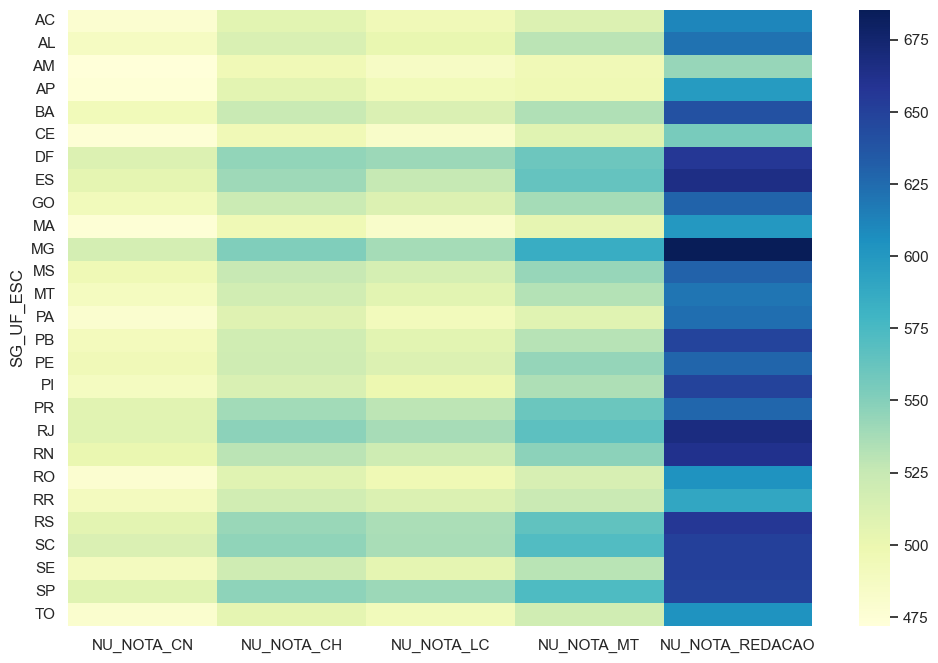

In [105]:
sns.heatmap(heatmap_estados, cmap = 'YlGnBu')

<Axes: ylabel='REGIAO'>

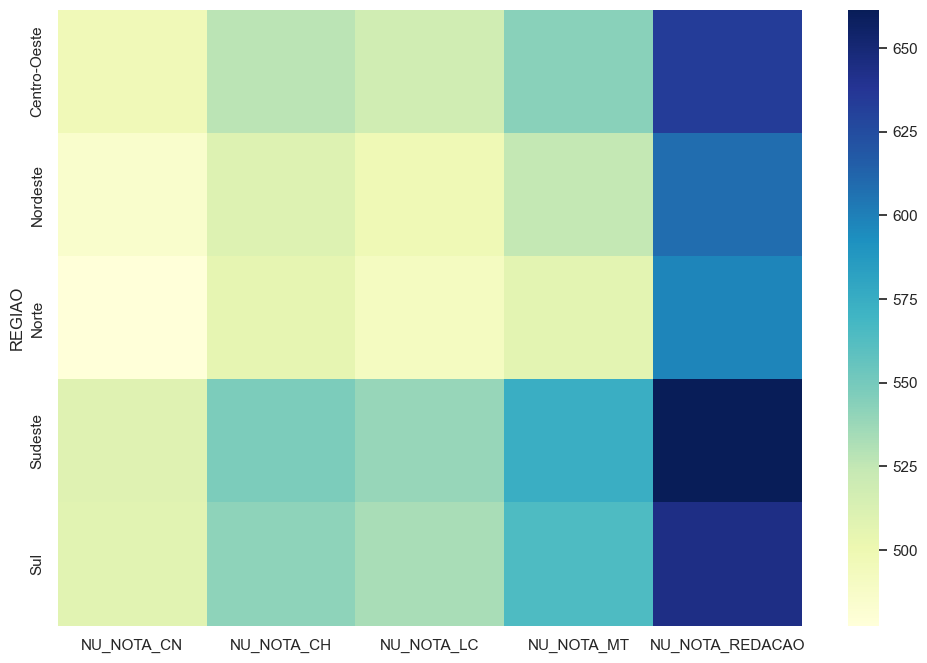

In [106]:
sns.heatmap(heatmap_regiao, cmap = 'YlGnBu')

Agora, faremos uma análise por boxplots. Desta forma, conseguimos enxergar melhor como as notas se distribuem.

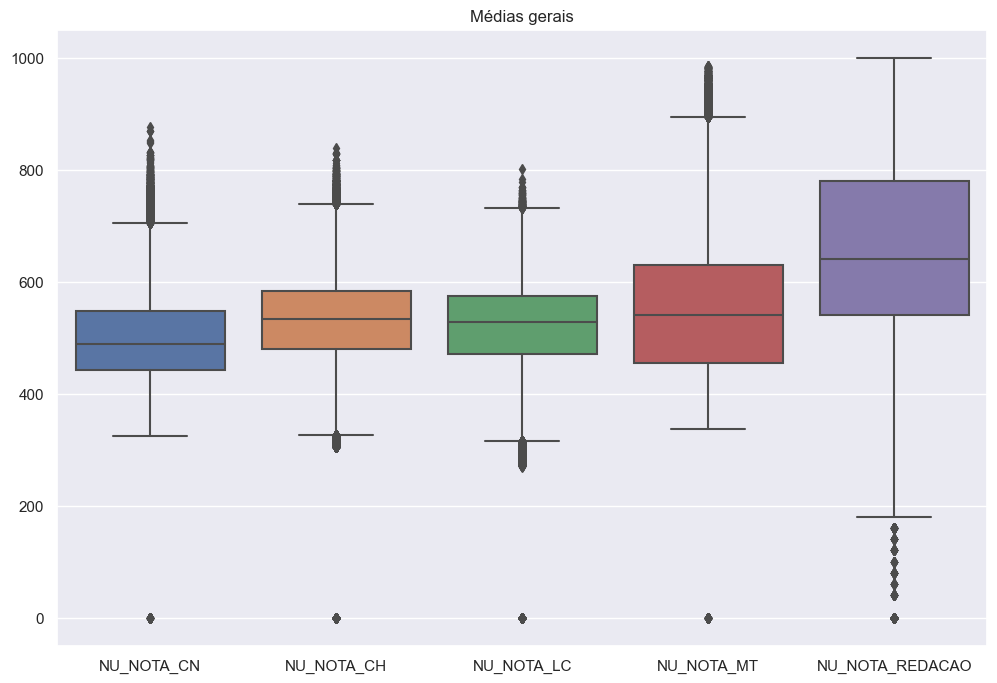

In [107]:
sns.boxplot(df_filtered)
plt.title('Médias gerais')
plt.show()

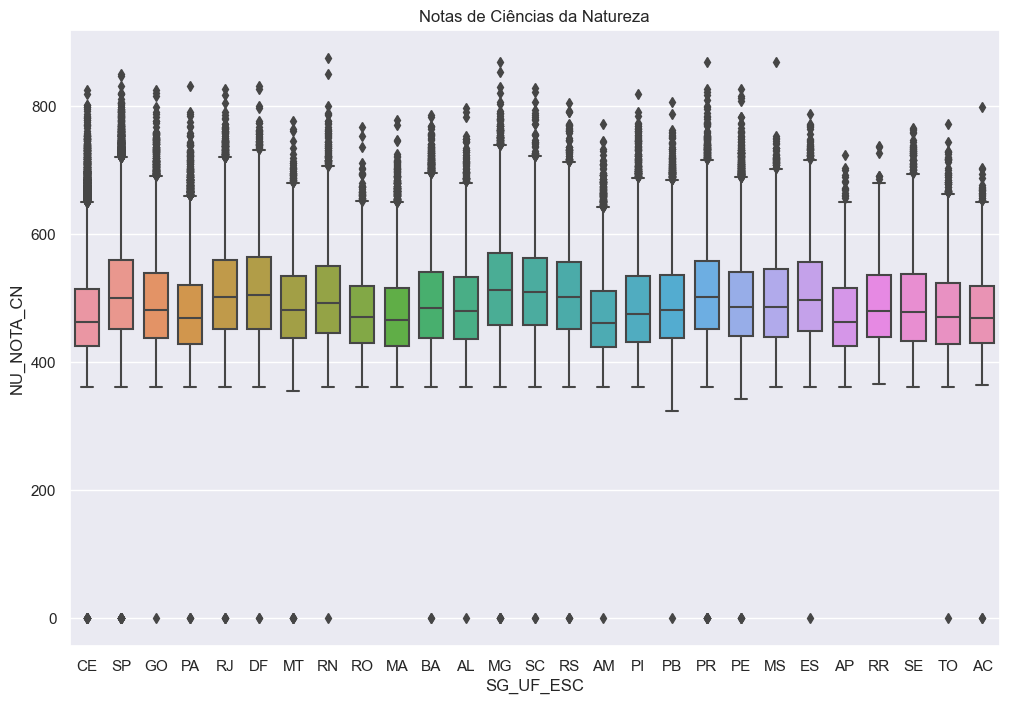

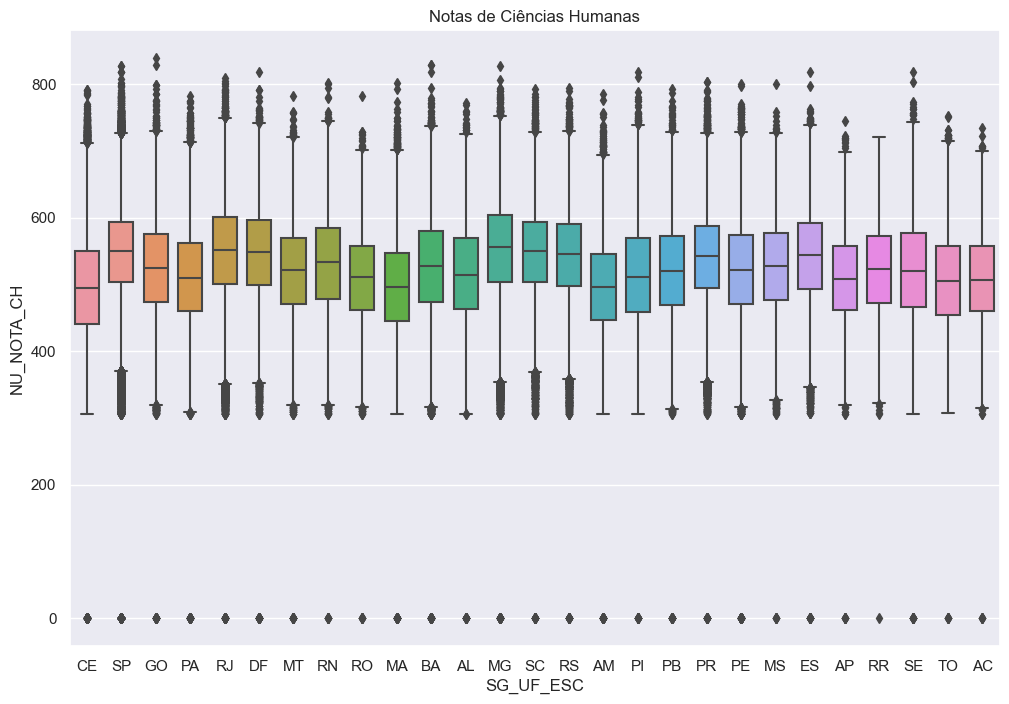

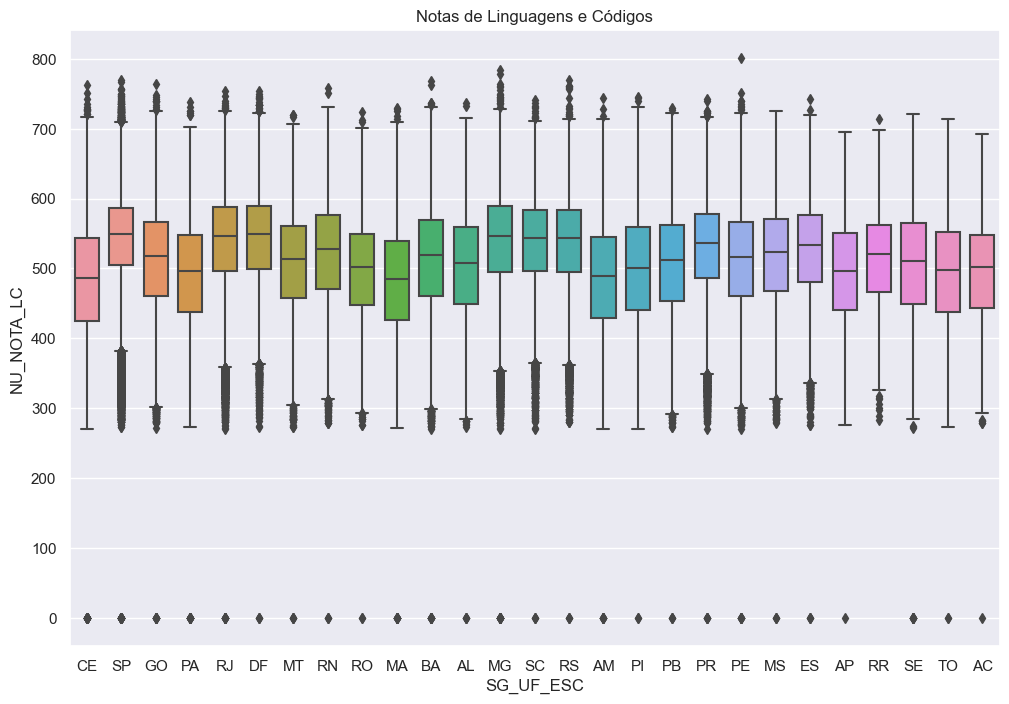

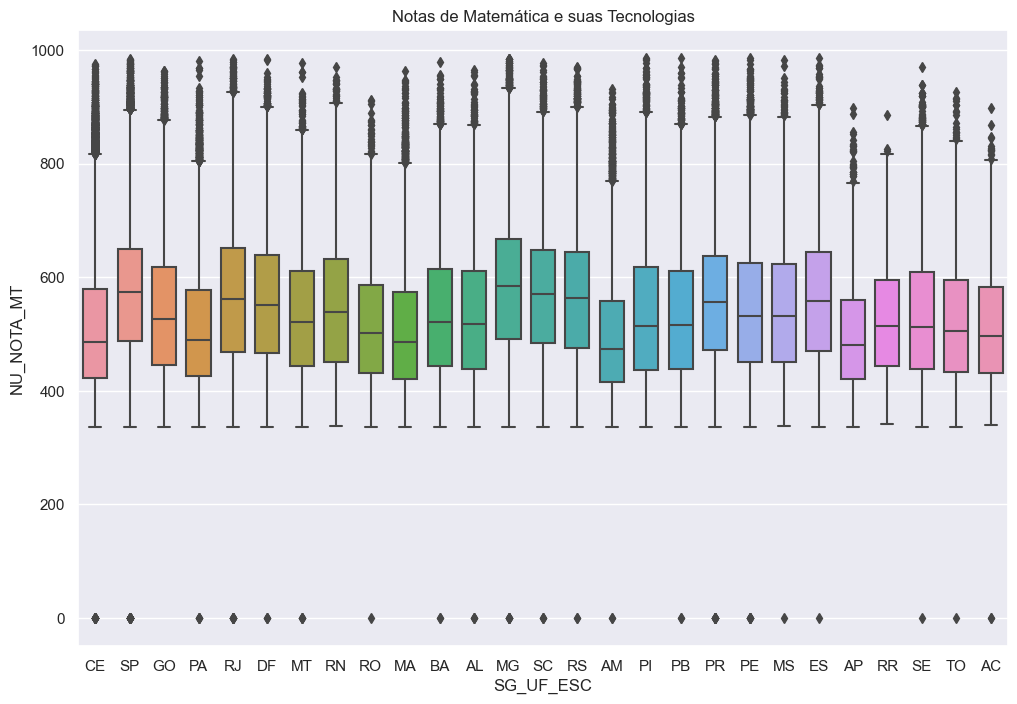

In [108]:
provas = {'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH':'Ciências Humanas', 'NU_NOTA_LC':'Linguagens e Códigos','NU_NOTA_MT':'Matemática e suas Tecnologias'}

for prova in provas.keys():
    sns.boxplot(df_filtered,x = 'SG_UF_ESC',y = prova, width = 0.7)
    plt.title(f'Notas de {provas[prova]}')
    plt.show()

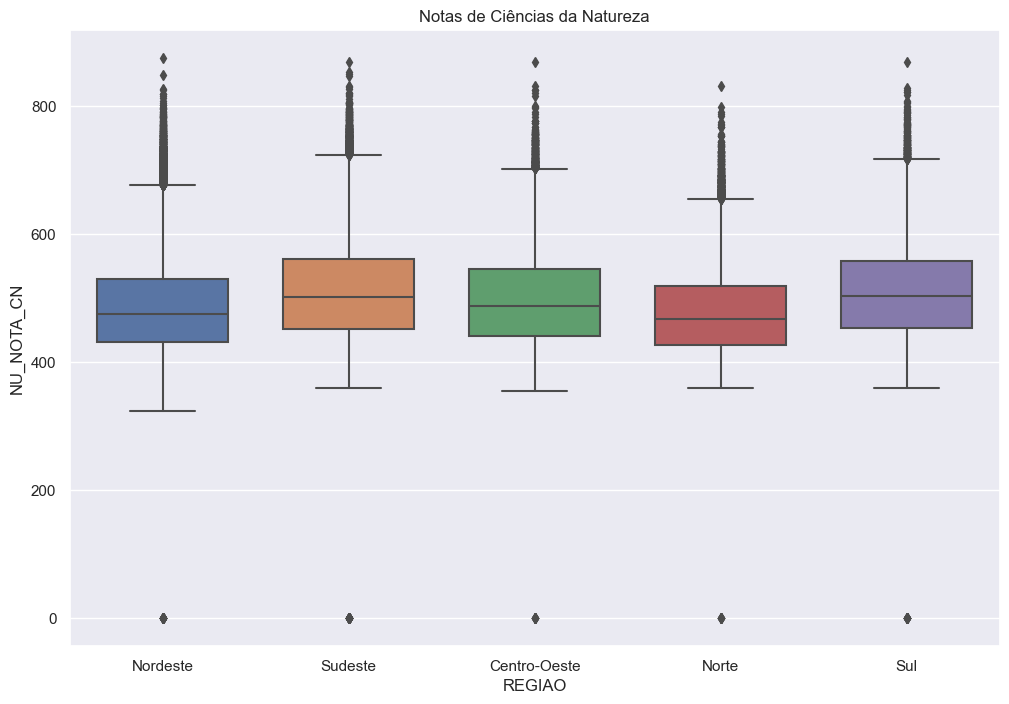

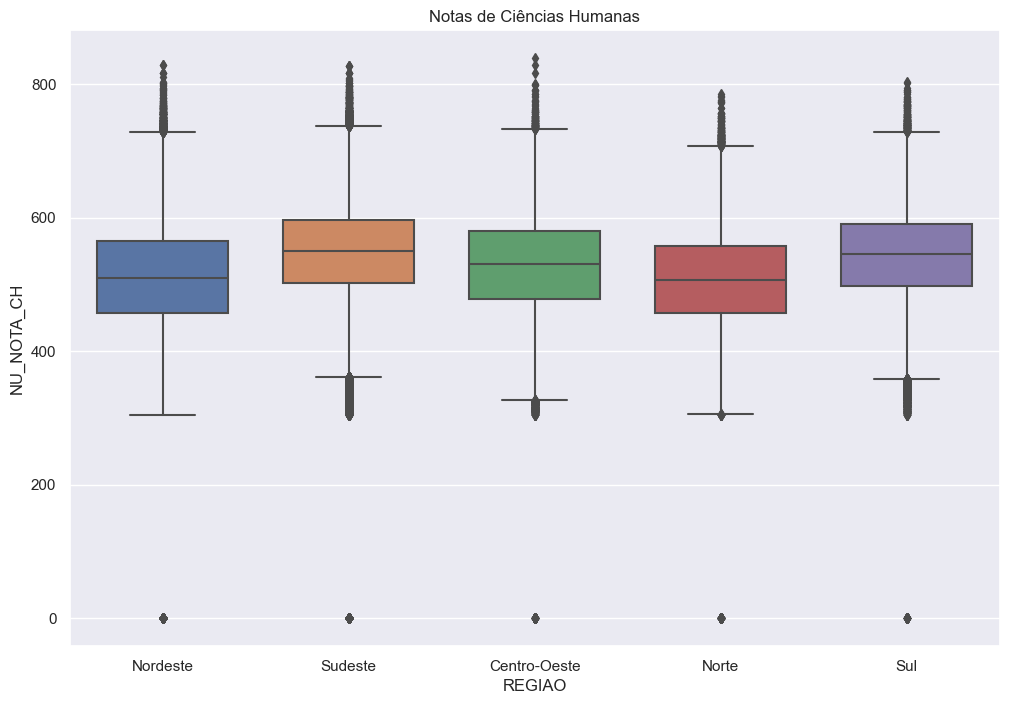

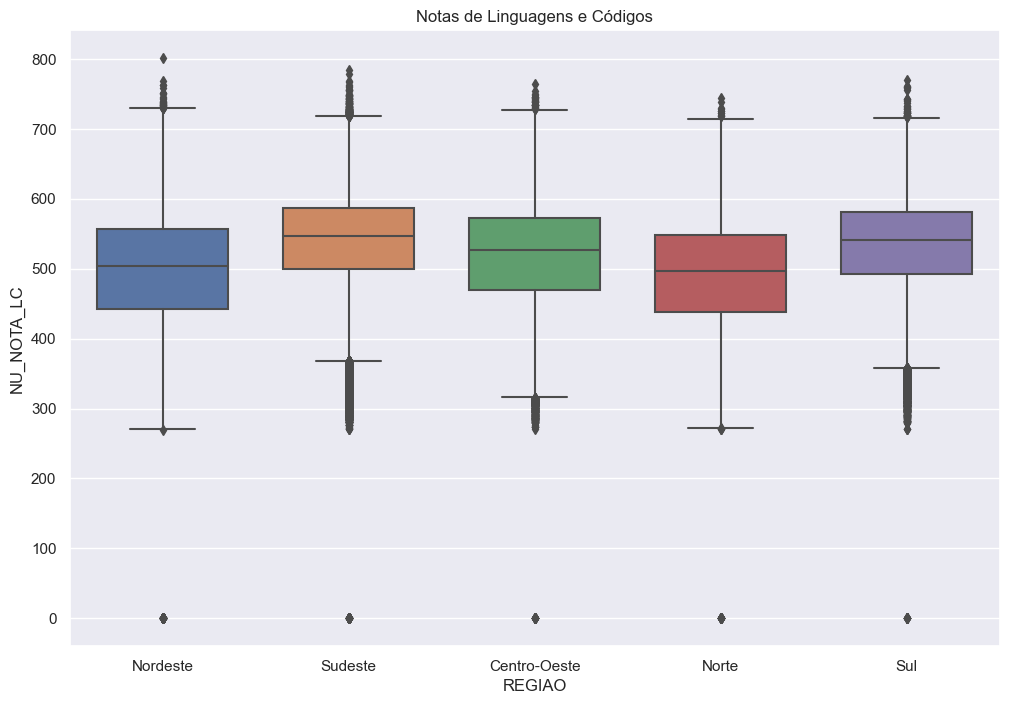

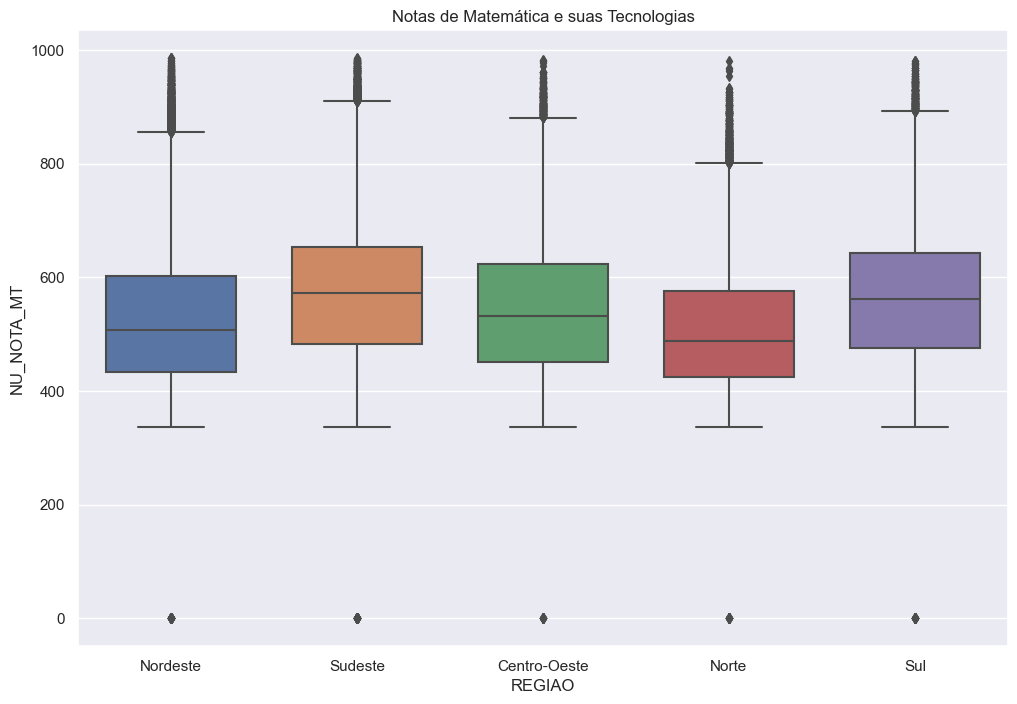

In [48]:
provas = {'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH':'Ciências Humanas', 'NU_NOTA_LC':'Linguagens e Códigos','NU_NOTA_MT':'Matemática e suas Tecnologias'}

for prova in provas.keys():
    sns.boxplot(df_filtered,x = 'REGIAO',y = prova, width = 0.7)
    plt.title(f'Notas de {provas[prova]}')
    plt.show()

Com esses gráficos, é possível notar que as regiões do Sul, Sudeste e Centro-Oeste tem notas ligeiramente maiores que as regiões Norte e Nordeste em média. Além disso, Minas Gerais é o estado brasileiro com as maiores notas no ENEM em geral.

Apesar disso, não há discrepâncias absurdas de notas, como pode ser visto nos gráficos de boxplot acima, apenas uma tendência geral de notas maiores para a região mais ao sul do país.